# IMPORTING REQUIRED LIBRARIES

In [108]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression

from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# ''' REGULARIZATION '''

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

# Reading the data

In [109]:
df = pd.read_csv('listings.csv')

In [110]:
df.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211200000000.000000,05-12-2021,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,09-09-2008,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,within a day,80%,17%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,8.000000,8.000000,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.753560,-73.985590,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.000000,"[""Extra pillows and blankets"", ""Baking sheet"",...",$150.00,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,t,3,33,63,338,05-12-2021,48,0,0,21-11-2009,04-11-2019,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,NaN,f,3,3,0,0,0.330000


In [111]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [112]:
# dimensions of data
df.shape

(38277, 74)

In [113]:
# checking datatypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38277 entries, 0 to 38276
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38277 non-null  int64  
 1   listing_url                                   38277 non-null  object 
 2   scrape_id                                     38277 non-null  float64
 3   last_scraped                                  38277 non-null  object 
 4   name                                          38264 non-null  object 
 5   description                                   37085 non-null  object 
 6   neighborhood_overview                         22650 non-null  object 
 7   picture_url                                   38277 non-null  object 
 8   host_id                                       38277 non-null  int64  
 9   host_url                                      38277 non-null 

In [114]:
# price , host_responserate , host_acceptance have different data types we need to change them to required types
# After cleaning the anamolies 

In [115]:
df.describe(include = np.number)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,38277.000000,38277.000000,38277.000000,38243.000000,38243.000000,38277.000000,38277.000000,38277.000000,0.000000,34302.000000,35872.000000,38277.000000,38277.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,38259.000000,0.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000,28161.000000,28172.000000,28154.000000,28165.000000,28151.000000,28150.000000,38277.000000,38277.000000,38277.000000,38277.000000,28773.000000
mean,29622391.364945,20211200000000.000000,114830455.233874,49.020056,49.020056,40.729206,-73.948967,2.792094,NaN,1.323567,1.593527,21.623769,57796.642553,21.835620,27.618939,1461230.932225,3538051.803262,27.205186,2247183.247801,NaN,6.905531,19.787523,33.946391,134.290984,23.302871,5.032160,0.539802,4.585140,4.743904,4.612408,4.813884,4.807454,4.750307,4.646892,17.747655,8.042637,9.593934,0.047966,1.721019
std,17422394.081480,0.000000,129919366.832031,312.947661,312.947661,0.055752,0.050759,1.869736,NaN,0.708327,1.078893,29.573333,10977368.411933,34.363195,69.948235,55964015.090109,87072570.881856,68.146270,65159632.813771,NaN,10.017318,22.038048,34.836649,143.196175,50.415484,14.693768,1.489229,0.835918,0.496406,0.575452,0.439260,0.465544,0.416101,0.518905,59.150451,34.977178,43.310123,0.426789,4.399826
min,2595.000000,20211200000000.000000,2438.000000,0.000000,0.000000,40.504560,-74.249840,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,13410478.000000,20211200000000.000000,11394622.000000,1.000000,1.000000,40.689260,-73.983270,2.000000,NaN,1.000000,1.000000,3.000000,60.000000,3.000000,3.000000,360.000000,365.000000,3.000000,365.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.570000,4.700000,4.500000,4.800000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.120000
50%,30812691.000000,20211200000000.000000,50052968.000000,1.000000,1.000000,40.725180,-73.954770,2.000000,NaN,1.000000,1.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,1.000000,8.000000,25.000000,73.000000,4.000000,0.000000,0.000000,4.820000,4.900000,4.800000,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.480000
75%,46428551.000000,20211200000000.000000,200239515.000000,3.000000,3.000000,40.762680,-73.930430,4.000000,NaN,1.000000,2.000000,30.000000,1125.000000,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,NaN,11.000000,38.000000,67.000000,302.000000,20.000000,3.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.780000
max,53665099.000000,20211200000000.000000,434408046.000000,3750.000000,3750.000000,40.914020,-73.710870,16.000000,NaN,16.000000,24.000000,1250.000000,2147483647.000000,1250.000000,1250.000000,2147483647.000000,2147483647.000000,1250.000000,2147483647.000000,NaN,30.000000,60.000000,90.000000,365.000000,1009.000000,669.000000,67.000000,5.000000,5.000000,5.

In [116]:
df.describe(include = np.object)

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
count,38277,38277,38264,37085,22650,38277,38277,38243,38243,38140,22128,21084,21084,21791,38243,38243,38243,30813,38277,38243,38243,22651,38277,38277,38277,38277,38170,38277,38277,38277,38277,28773,28773,1,38277
unique,38277,2,36869,34133,18614,37148,25904,9123,4289,1747,14424,4,88,101,2,25686,25686,484,526,2,2,207,222,5,78,4,30,31740,949,2,2,3171,2560,1,2
top,https://www.airbnb.com/rooms/2595,05-12-2021,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,Walk out of the Cassa and you’ll immediately ...,https://a0.muscache.com/pictures/6998e77e-4564...,https://www.airbnb.com/users/show/305240193,June,29-10-2019,"New York, New York, United States",If you're searching for a place of your own or...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/4adc1...,https://a0.muscache.com/im/pictures/user/4adc1...,Bedford-Stuyvesant,"['email', 'phone']",t,t,"New York, United States",Bedford-Stuyvesant,Manhattan,Entire rental unit,Entire home/apt,1 bath,"[""Long term stays allowed""]",$150.00,t,05-12-2021,01-01-2020,28-11-2021,41662/AL,f
freq,1,31879,30,61,84,36,421,431,433,21102,421,11151,13299,5342,30865,421,421,2138,4357,37994,31866,9301,2821,16781,16014,20397,19697,142,1307,36159,31879,119,789,1,27851


# Cleaning the anamolies 

In [117]:
df['price'] = df['price'].str.replace('$', '')

In [118]:
df['price'] = df['price'].str.replace(',' , '')

In [119]:
df['price'] =df['price'].astype(float)

In [120]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%' , '')
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%' , '')

In [121]:
df['host_response_rate'] =df['host_response_rate'].astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)

# Drop unnecessry columns 

In [122]:
df.drop(['id','listing_url','scrape_id' , 'last_scraped' , 'name','description','picture_url','host_id',\
         'host_url','host_name','host_location','host_about','host_response_time','host_thumbnail_url','host_picture_url',\
        'host_neighbourhood','host_listings_count','host_verifications','host_has_profile_pic'],axis=1,inplace=True)

In [123]:
df.drop(['neighbourhood','neighbourhood_cleansed','latitude','longitude','property_type','amenities',\
         'has_availability','calendar_last_scraped' , 'number_of_reviews_l30d' , 'first_review' , 'last_review' ],axis =1 , inplace = True)

In [124]:
df.drop(['neighborhood_overview' , 'host_since'] ,axis =1 , inplace = True)

In [125]:
#df['host_listings_count'].sum() # drop since both the columns are same 

In [126]:
#df['host_total_listings_count'].sum()

In [127]:
#df['longitude'].std() #instead of the latitude and longitude we going with neighbourhood group cleansed for the location

In [128]:
# neighbourhood_overiview  , 'neighbourhood' , 'neighbourhood_cleansed' == 'neighbourhood_group_cleansed'

In [129]:
# host_listings count and host_total_listings_count giving same information 

# Missing values

In [130]:
def missing(data):
    total = data.isnull().sum()
    percentage = total /len(data) *100
    missing_percentage = pd.concat([total  , percentage] , axis = 1 , keys = ['Total' , 'Percentage'])
    return missing_percentage

In [131]:
missing_data =missing(df).sort_values(by = 'Percentage' , ascending = False)

In [132]:
missing_data[missing_data['Percentage'] > 70.00]

,Total,Percentage
calendar_updated,38277,100.000000
bathrooms,38277,100.000000
license,38276,99.997387


In [133]:
df.drop(['bathrooms' , 'calendar_updated' , 'license'] , axis = 1, inplace = True)

In [134]:
df.shape

(38277, 39)

In [135]:
missing(df)

,Total,Percentage
host_response_rate,17193,44.917313
host_acceptance_rate,16486,43.070251
host_is_superhost,34,0.088826
host_total_listings_count,34,0.088826
host_identity_verified,34,0.088826
neighbourhood_group_cleansed,0,0.000000
room_type,0,0.000000
accommodates,0,0.000000
bathrooms_text,107,0.279541
bedrooms,3975,10.384826


# Missing value Treatment

In [136]:
df_feature = df.drop('price' ,axis =1)

In [137]:
df_feature.shape

(38277, 38)

In [342]:
df_target = df[['price']]

In [139]:
df_num = df_feature.select_dtypes(include = np.number)
df_num.shape

(38277, 32)

In [140]:
df_cat = df_feature.select_dtypes(include = np.object)
df_cat.shape

(38277, 6)

# Treatment for categorical variables

In [141]:
df_cat['host_is_superhost'].value_counts()

f    30865
t     7378
Name: host_is_superhost, dtype: int64

In [142]:
for i in df_cat.columns :
    df_cat[i] = df_cat[i].fillna(df_cat[i].mode()[0])

In [143]:
missing(df_cat)

,Total,Percentage
host_is_superhost,0,0.000000
host_identity_verified,0,0.000000
neighbourhood_group_cleansed,0,0.000000
room_type,0,0.000000
bathrooms_text,0,0.000000
instant_bookable,0,0.000000


# Treatment for numerical variables 

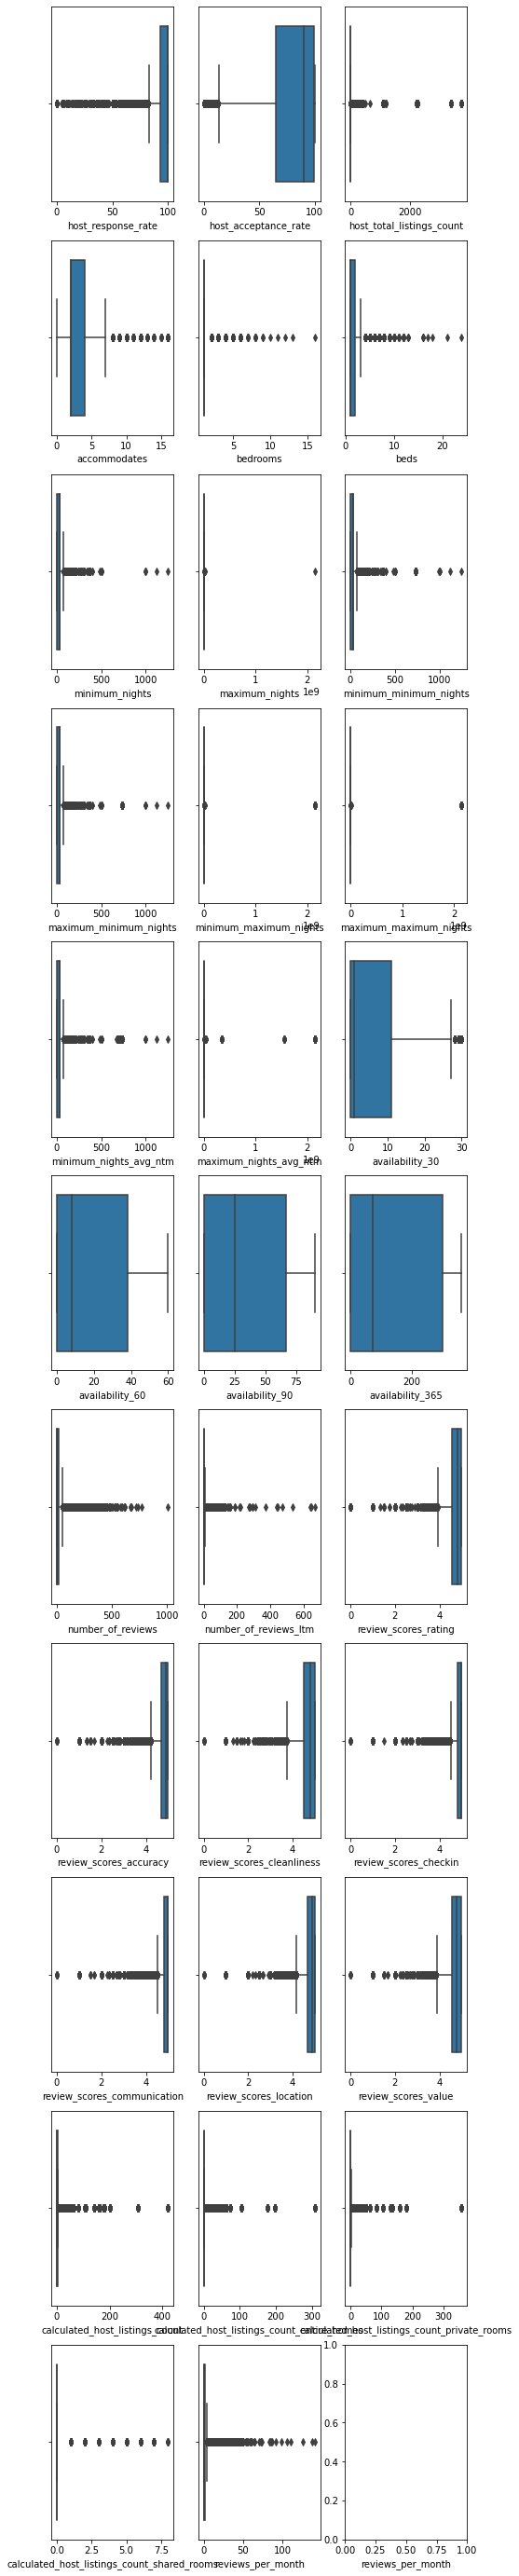

<Figure size 432x288 with 0 Axes>

In [144]:
fig , ax = plt.subplots(11,3,figsize = (8 , 50))
for i , subplot in zip(df_num.columns, ax.flatten()):
    sns.boxplot( df_num[i], ax = subplot)
plt.xlabel(i)

plt.show()
plt.tight_layout()

In [145]:
# Treatment based upon the outliers ,since ouliers presence causes huge impact here we are treating them with median 
# and the rest of variabels with  mean ()

In [147]:
for i in df_num.drop('host_response_rate' , axis = 1).columns:
    df_num[i] = df_num[i].fillna(df_num[i].median())  

In [149]:
df_num['host_response_rate'].fillna(df_num['host_response_rate'].mean() , inplace =  True)

In [150]:
missing(df_num)

,Total,Percentage
host_response_rate,0,0.000000
host_acceptance_rate,0,0.000000
host_total_listings_count,0,0.000000
accommodates,0,0.000000
bedrooms,0,0.000000
beds,0,0.000000
minimum_nights,0,0.000000
maximum_nights,0,0.000000
minimum_minimum_nights,0,0.000000
maximum_minimum_nights,0,0.000000


# Outlier detection

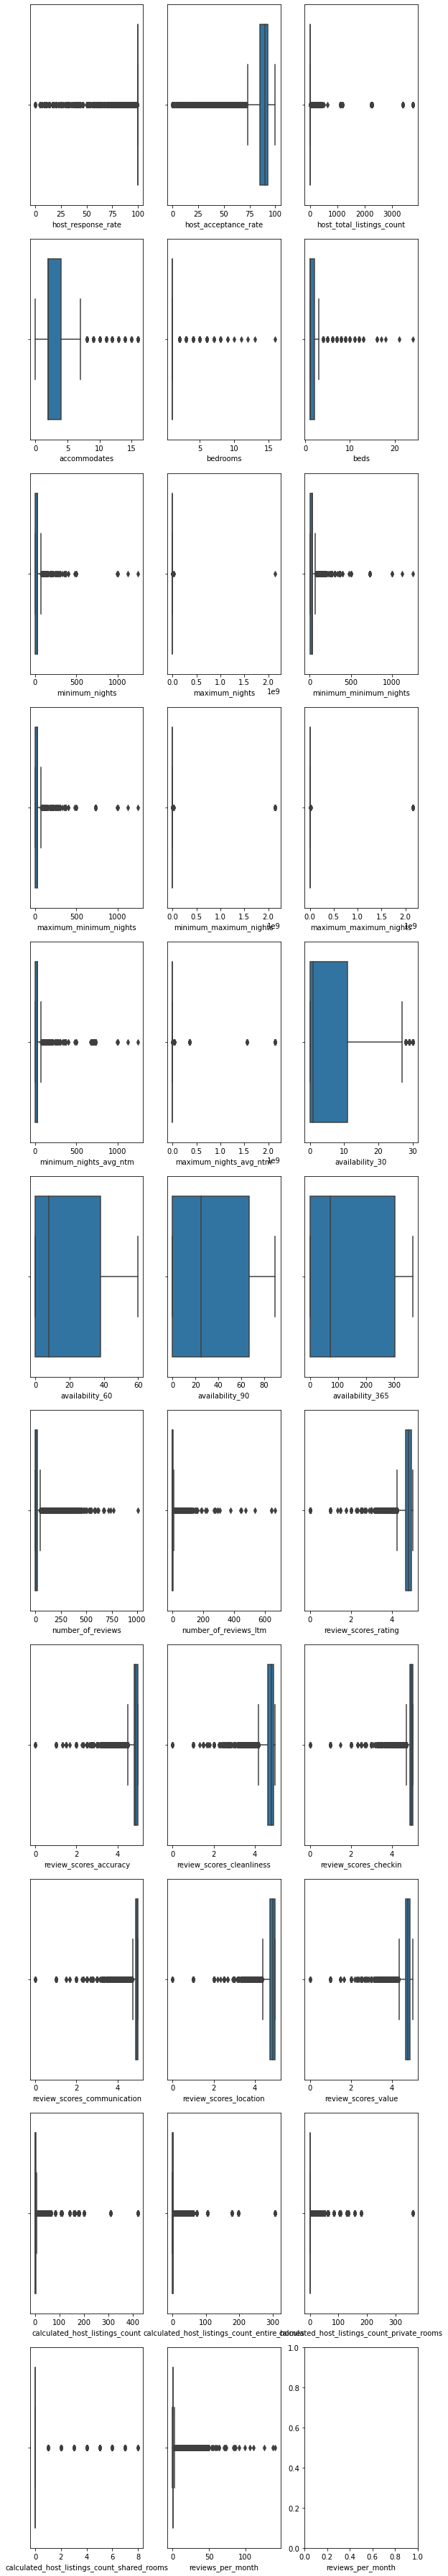

<Figure size 432x288 with 0 Axes>

In [103]:

fig , ax = plt.subplots(11 , 3,figsize = (8 , 50))
for i , subplot in zip(df_num.columns , ax.flatten()):
    sns.boxplot(df_num[i] , ax = subplot)
    plt.xlabel(i)
    plt.tight_layout()

plt.show()
plt.tight_layout()


<AxesSubplot:xlabel='host_response_rate'>

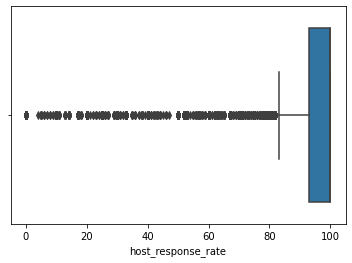

In [104]:
sns.boxplot(df['host_response_rate'])

In [105]:
df['host_response_rate'].describe()

count   21084.000000
mean       89.073136
std        25.110837
min         0.000000
25%        93.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: host_response_rate, dtype: float64

# Outlier Treatment

In [151]:
for i in df_num.columns:
    Q1 = df_num[i].quantile(0.25)
    Q3 = df_num[i].quantile(0.75)
    IQR = Q3 -Q1
    UL = Q3 +(1.5 * IQR)
    LL = Q1 - (1.5* IQR)
    for e,j in enumerate(df_num[i]):
        if j>UL:
            df_num[i][e]=UL
        elif j<LL:
            df_num[i][e]=LL

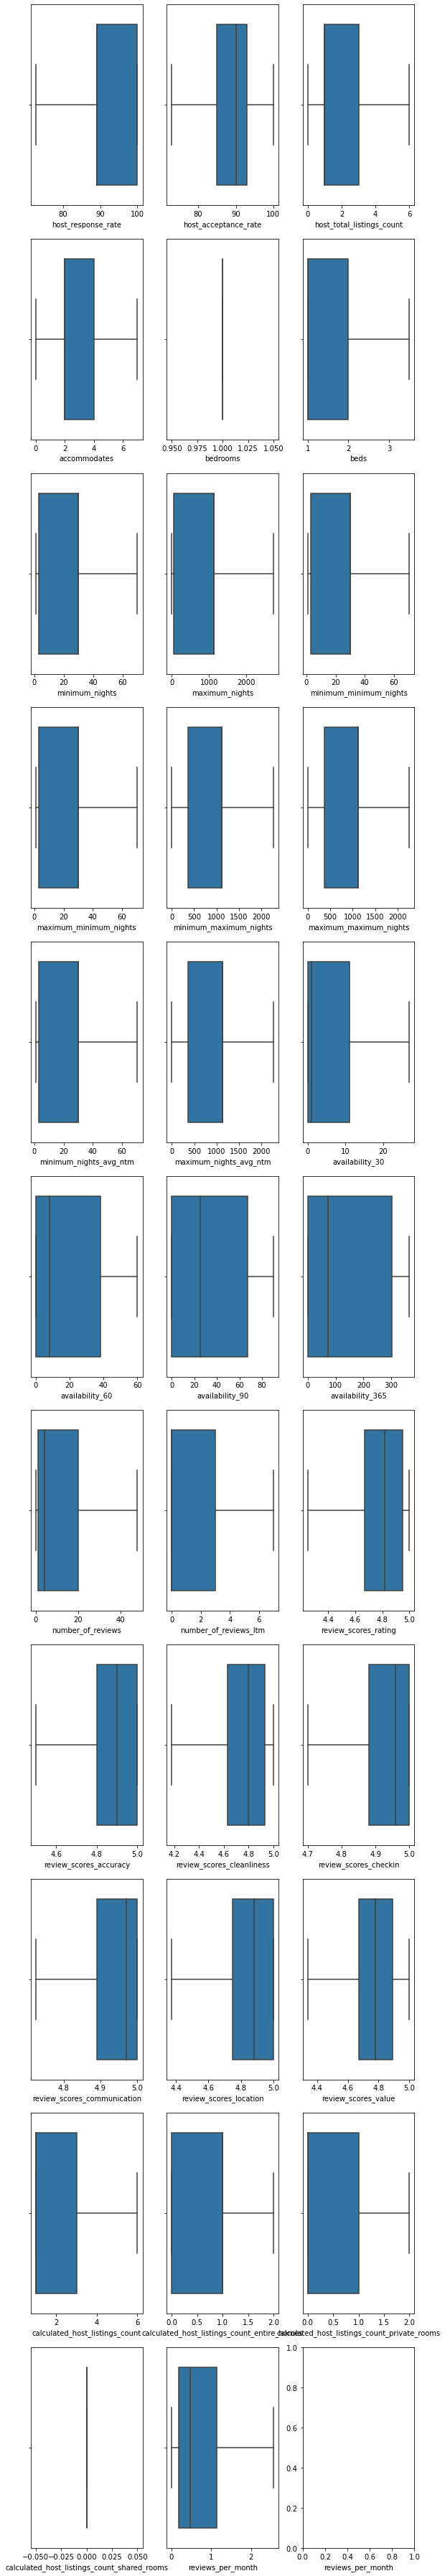

<Figure size 432x288 with 0 Axes>

In [152]:
fig , ax = plt.subplots(11,3,figsize = (8 , 50))
for i , subplot in zip(df_num.columns , ax.flatten()):
    sns.boxplot(df_num[i] , ax = subplot)
    plt.xlabel(i)
    plt.tight_layout()

plt.show()
plt.tight_layout()


<AxesSubplot:xlabel='price'>

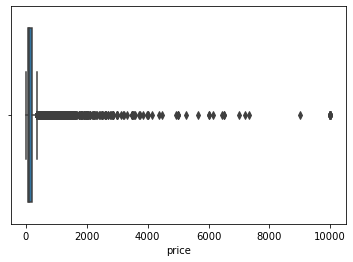

In [62]:
sns.boxplot(df_target['price'])

In [273]:
# We are leaving price(target variable and treating rest of them)

# Encoding

In [153]:
df_cat['room_type'].value_counts()

Entire home/apt    20397
Private room       17098
Shared room          572
Hotel room           210
Name: room_type, dtype: int64

In [154]:
df_cat['room_type']= df_cat['room_type'].replace('Entire home/apt' , 'Entire home')

In [155]:
df.groupby('bathrooms_text').mean()['price'].sort_values(ascending = False)

bathrooms_text
4.5 shared baths    1950.000000
7 baths             1950.000000
8 baths             1461.333333
5 baths             1406.909091
6 baths             1359.200000
5.5 baths           1347.000000
4.5 baths           1216.761905
6.5 baths            900.000000
3.5 baths            882.721519
4 baths              810.034483
3 baths              689.378378
7.5 baths            579.500000
2.5 baths            488.221498
2 baths              351.451159
4 shared baths       290.090909
Half-bath            243.875000
1.5 baths            226.389798
0 baths              220.418605
1 private bath       203.358593
1 bath               176.384982
6 shared baths       139.500000
0 shared baths        98.169014
Shared half-bath      90.266667
1 shared bath         86.633884
2 shared baths        83.164894
1.5 shared baths      79.248247
Private half-bath     78.818182
3 shared baths        62.095745
2.5 shared baths      58.346939
3.5 shared baths      40.500000
Name: price, dtype: float

In [38]:
# Here we are replacing based upon the mean price values : bathrooms categorized into three categories 

In [156]:
df_cat['bathrooms_text'] = df_cat['bathrooms_text'].replace({'0 shared baths' , 'Shared half-bath','1 shared bath' ,'1.5 shared baths',\
                                                             '2 shared baths' , '2.5 shared baths' , '3 shared baths' ,'3.5 shared baths'\
                                                             , '4 shared baths' , '4.5 shared baths' , '6 shared baths'} \
                                                            , 'shared_bathroom')
                                                             
                                                             

In [157]:
df_cat['bathrooms_text'] = df_cat['bathrooms_text'].replace({'0 baths' , 'Half-bath' , '1 bath','1.5 baths' , '2 baths','2.5 baths',\
                                                                   '3 baths' ,'3.5 baths','4 baths','4.5 baths',\
                                                                   '5 baths','5.5 baths','6 baths','6.5 baths','7 baths','7.5 baths',\
                                                                   '8 baths'} , 'baths')

In [158]:
df_cat['bathrooms_text'] = df_cat['bathrooms_text'].replace({'Private half-bath' , '1 private bath'} , 'private_bath')

In [159]:
df_cat['bathrooms_text'].value_counts()

baths              23805
shared_bathroom    11703
private_bath        2769
Name: bathrooms_text, dtype: int64

In [160]:
df_cat.head(5)

,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,f,t,Manhattan,Entire home,baths,f
1,f,t,Brooklyn,Entire home,baths,f
2,f,t,Brooklyn,Private room,baths,f
3,f,t,Brooklyn,Entire home,baths,f
4,f,f,Manhattan,Private room,baths,f


In [161]:
df_num.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000
2,100.000000,100.000000,1.000000,2,1.000000,1.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,27,60,90,365,48,0,4.520000,4.500000,4.180000,4.910000,4.910000,4.470000,4.520000,2,0,2,0,0.520000
3,100.000000,73.000000,1.000000,4,1.000000,2.000000,5,1125,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,3,3,12,123,2,1,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1,1,0,0,0.020000
4,100.000000,100.000000,1.000000,2,1.000000,1.000000,2,14,2.000000,2.000000,14.000000,14.000000,2.000000,14.000000,1,16,34,192,48,7,4.250000,4.500000,4.180000,4.700000,4.725000,4.870000,4.360000,1,0,1,0,2.565000


# Concatenation 

In [162]:
df_new = pd.concat([df_num , df_cat] ,axis =1)

In [163]:
df_new.head(2)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,f,t,Manhattan,Entire home,baths,f
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000,f,t,Brooklyn,Entire home,baths,f


# Creating dummies 

In [789]:
df_dum = pd.get_dummies(df_cat , drop_first = True)

In [165]:
# Final dataframe

In [166]:
df_encoded = pd.concat([df_num , df_dum] , axis =1)

# Univariant Analysis 

In [167]:
df_encoded.head(1)

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_private_bath,bathrooms_text_shared_bathroom,instant_bookable_t
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,0,1,0,1,0,0,0,0,0,0,0,0


In [478]:
plt.rcParams['figure.figsize'] = [7,4]

<AxesSubplot:xlabel='host_response_rate', ylabel='Density'>

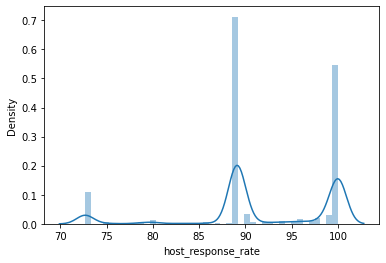

In [168]:
sns.distplot(df_new['host_response_rate'])

<AxesSubplot:xlabel='host_acceptance_rate', ylabel='Density'>

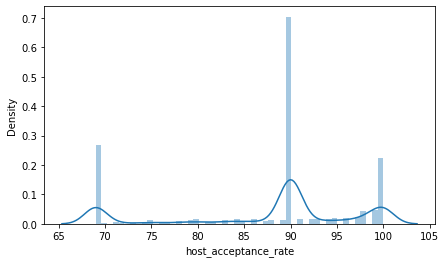

In [480]:
sns.distplot(df_new['host_acceptance_rate'])

In [481]:
# There is a maximum probability that the hosts are accepting the customer request

<AxesSubplot:xlabel='host_total_listings_count', ylabel='Density'>

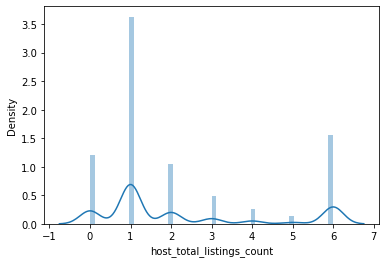

In [169]:
sns.distplot(df_new['host_total_listings_count'])

<AxesSubplot:xlabel='host_total_listings_count', ylabel='count'>

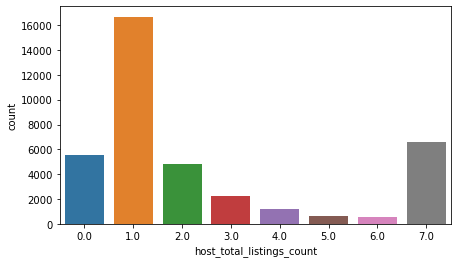

In [483]:
sns.countplot(df_new['host_total_listings_count'])

In [484]:
# most of the hosts have single listings 

<AxesSubplot:xlabel='accommodates', ylabel='count'>

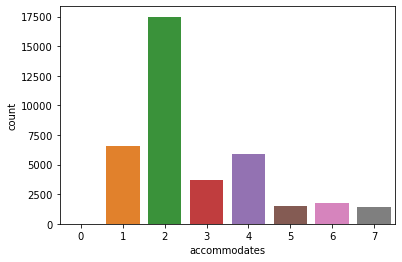

In [170]:
sns.countplot(df_new['accommodates'])

In [486]:
# There are more number of listings with 2 accomodates 

<AxesSubplot:xlabel='beds', ylabel='count'>

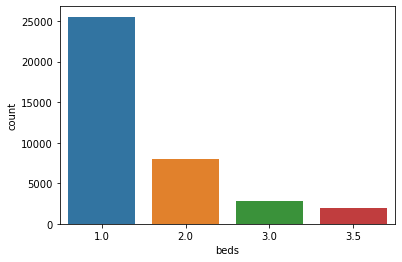

In [171]:
sns.countplot(df_new['beds'])

In [488]:
# Most of the listings have single beds in the room 

In [489]:
# Target Variable (distribution)

<AxesSubplot:xlabel='price', ylabel='Density'>

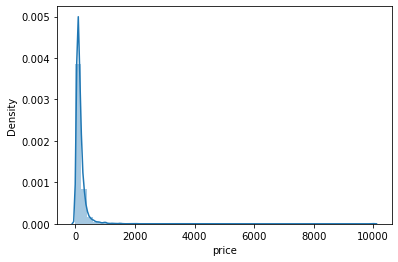

In [172]:
sns.distplot(df_target['price'])

In [491]:
# Since price is right skewed we need to transform 
# our target variable should be always normally distributed 

In [51]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

<AxesSubplot:xlabel='price', ylabel='Density'>

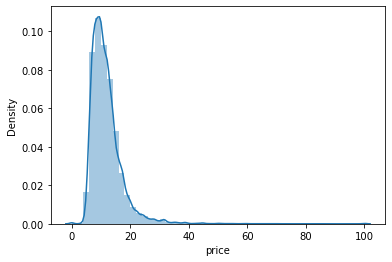

In [181]:
sns.distplot(np.sqrt(df_target['price']))

In [494]:
# Here price looks near normal distribution 

# Bivariant Analysis

In [495]:
loc =df_new.groupby(['neighbourhood_group_cleansed']).mean()['price']

<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='price'>

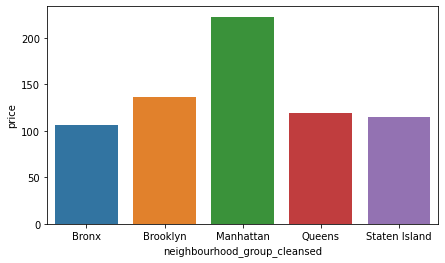

In [496]:
sns.barplot(loc.index , loc)

In [497]:
# The Average price is higher in Manhattan compared to other locatios

In [498]:
pd.crosstab(df_new['instant_bookable'] ,df_new['neighbourhood_group_cleansed'])

neighbourhood_group_cleansed,Bronx,Brooklyn,Manhattan,Queens,Staten Island
instant_bookable,,,,,
f,740,11219,11849,3773,270
t,364,3497,4932,1550,83


In [499]:
# Here we can see most number of bookings are happeing in Manhattan
# Least number of bookings happening in Staten Island

In [500]:
loc2 =df_new.groupby('accommodates').mean()['price']

<AxesSubplot:xlabel='accommodates', ylabel='price'>

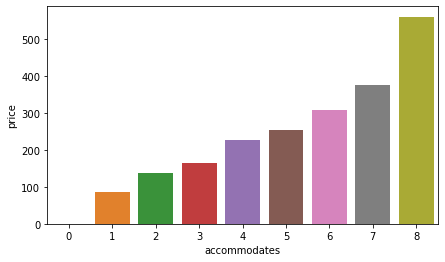

In [501]:
sns.barplot(loc2.index , loc2)

In [502]:
# Increase in accomodates increases price 

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

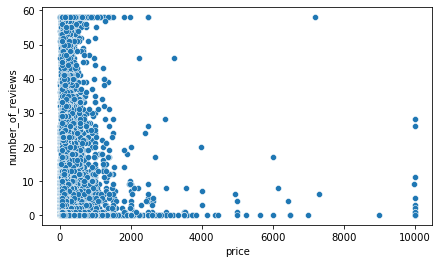

In [503]:
sns.scatterplot(df_new['price'] ,df_new['number_of_reviews'])

In [504]:
# The effect of reviews on price
# increase in price leads to decrease in reviews which means 
# if the price is high maybe you may not get a booking

In [505]:
loc3 =df_new.groupby(['room_type']).mean()['price']

<AxesSubplot:xlabel='room_type', ylabel='price'>

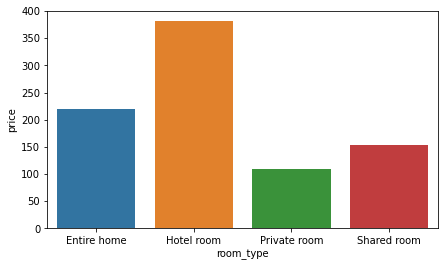

In [506]:
sns.barplot(loc3.index , loc3)

In [507]:
# The Average price of Hotel room is higher compared to others 

<AxesSubplot:xlabel='bathrooms_text', ylabel='price'>

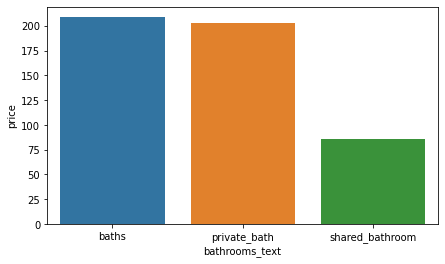

In [508]:
loc5 =df_new.groupby('bathrooms_text').mean()['price']
sns.barplot(loc5.index , loc5)

In [509]:
# The price of shared bathrooms is low (if someone wants a afforadble listings they can choose shared_bathrooms)

# Interpretation

In [510]:
import matplotlib.pyplot as plt

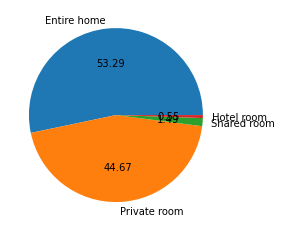

In [511]:
rtype = df_new['room_type'].value_counts()
plt.pie(rtype , labels = rtype.index , autopct = '%.2f' , radius = 1)
plt.show()

In [512]:
# Out of 100% more than 50% listings are Entire home 
# More number of listings are entire home followed by Private room 
# there are only 0.5% listings which are hotel rooms 

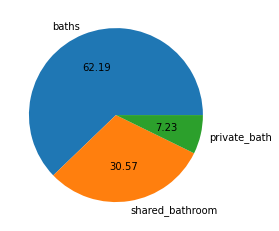

In [513]:
bath =df_new['bathrooms_text'].value_counts()
plt.pie(bath , labels =bath.index , autopct = '%.2f')
plt.show()

In [514]:
# Out of 100% , 62% bathrooms are individual bathrooms 
# Private bathrooms percentage is very low 

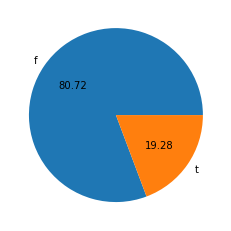

In [515]:
host = df_new['host_is_superhost'].value_counts() 
plt.pie(host ,labels = host.index, autopct = '%.2f')
plt.show()

# Available properties in each location

In [516]:
pd.crosstab(df_new['neighbourhood_group_cleansed'] , df_new['room_type'])

room_type,Entire home,Hotel room,Private room,Shared room
neighbourhood_group_cleansed,,,,
Bronx,440,1,634,29
Brooklyn,7529,9,6989,189
Manhattan,10188,191,6158,244
Queens,2056,9,3149,109
Staten Island,184,0,168,1


<AxesSubplot:xlabel='neighbourhood_group_cleansed', ylabel='count'>

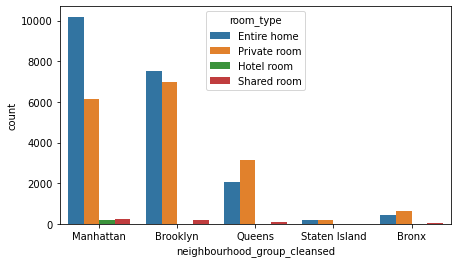

In [517]:
sns.countplot(df_new['neighbourhood_group_cleansed'] , hue = df_new['room_type'])

In [518]:
df.groupby(['neighbourhood_group_cleansed' , 'room_type']).mean()['price']

neighbourhood_group_cleansed  room_type      
Bronx                         Entire home/apt   153.452273
                              Hotel room          0.000000
                              Private room       76.047319
                              Shared room        59.034483
Brooklyn                      Entire home/apt   193.321822
                              Hotel room        120.555556
                              Private room       77.872800
                              Shared room        63.084656
Manhattan                     Entire home/apt   252.821457
                              Hotel room        405.308901
                              Private room      169.031504
                              Shared room       175.286885
Queens                        Entire home/apt   179.660506
                              Hotel room        171.111111
                              Private room       72.881867
                              Shared room       291.770642
Staten Isl

# Check for multicollinearity

In [519]:
df33 = df_new[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm' ]]

<AxesSubplot:>

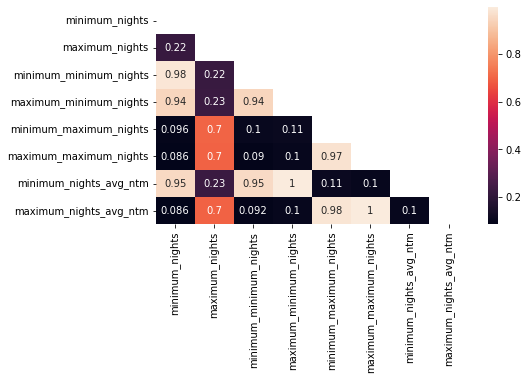

In [520]:
com = df33.corr()
mask = np.triu(com)
sns.heatmap(df33.corr() , annot = True , mask = mask)

In [521]:
# Here there is a  lot of multicollinearity exists between these columns

In [522]:
df44 = df[['availability_30', 'availability_60',
       'availability_90', 'availability_365']]

<AxesSubplot:>

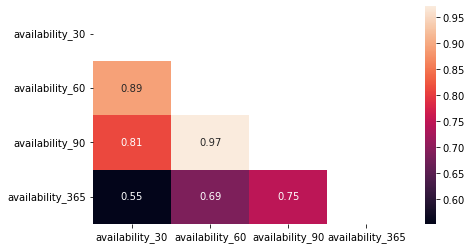

In [523]:
coa = df44.corr()
mask = np.triu(coa )
sns.heatmap(df44.corr() , annot = True , mask = mask)

In [524]:
# Here also lot of multicollinearity exists between columns

In [525]:
df_new.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,80.000000,69.000000,7.000000,1,1.000000,1.000000,150.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,3,0,0,0.330000,f,t,Manhattan,Entire home,baths,f
1,67.219408,69.000000,1.000000,3,1.000000,3.000000,75.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,58,9,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,4.783057,f,t,Brooklyn,Entire home,baths,f
2,100.000000,100.000000,1.000000,2,1.000000,1.000000,60.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,30,60,90,365,50,0,4.520000,4.400000,4.090000,4.910000,4.910000,4.470000,4.520000,2,0,2,0,0.520000,f,t,Brooklyn,Private room,baths,f
3,100.000000,69.000000,1.000000,4,1.000000,2.000000,275.000000,5,1125,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,3,3,12,123,2,1,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1,1,0,0,0.020000,f,t,Brooklyn,Entire home,baths,f
4,100.000000,100.000000,1.000000,2,1.000000,1.000000,68.000000,2,14,2.000000,2.000000,14.000000,14.000000,2.000000,14.000000,1,16,34,192,58,9,4.210000,4.400000,4.030000,4.660000,4.670000,4.870000,4.360000,1,0,1,0,3.680000,f,f,Manhattan,Private room,baths,f


# Statistical tests

In [526]:
# Statistical tests are used to prove the dependency of independent variable on target variable 

In [527]:
df_new['bathrooms_text'].value_counts()

baths              23805
shared_bathroom    11703
private_bath        2769
Name: bathrooms_text, dtype: int64

# One way annova

In [528]:
bath = df_new[df_new['bathrooms_text'] == 'baths']['price']
sbath = df_new[df_new['bathrooms_text'] == 'shared_bathroom']['price']
pbath = df_new[df_new['bathrooms_text'] == 'private_bath']['price']

In [529]:
import scipy.stats as stats

In [530]:
HN = 'All the sample means are equal'
HA = 'Atleast one sample mean is different'
stat , p_val =stats.f_oneway(bath , sbath ,pbath)
print('P_value' , p_val)
print('p_val is less than significance level so reject null' , HN )
print('Accept alternate' , HA)

P_value 1.218925448838764e-289
p_val is less than significance level so reject null All the sample means are equal
Accept alternate Atleast one sample mean is different


<AxesSubplot:xlabel='price', ylabel='Density'>

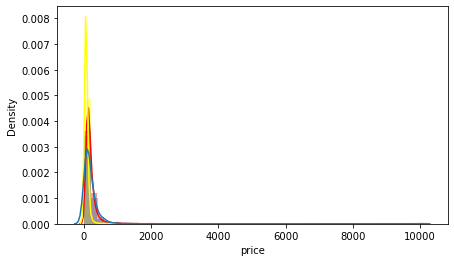

In [531]:
sns.distplot(bath , color = 'red')
sns.distplot(sbath , color = 'yellow')
sns.distplot(pbath)

In [532]:
# Clearly we can see the price is varying based up on bathrooms
# Shared bathrom the price is low

In [533]:
# Price based upon location

In [534]:
df_new['neighbourhood_group_cleansed'].value_counts()

Manhattan        16781
Brooklyn         14716
Queens            5323
Bronx             1104
Staten Island      353
Name: neighbourhood_group_cleansed, dtype: int64

In [535]:
Man = df_new[df_new['neighbourhood_group_cleansed'] == 'Manhattan']['price']
Brooklyn = df_new[df_new['neighbourhood_group_cleansed'] == 'Brooklyn']['price']
Queens = df_new[df_new['neighbourhood_group_cleansed'] == 'Queens']['price']
Bronx = df_new[df_new['neighbourhood_group_cleansed'] == 'Bronx']['price']
Staten = df_new[df_new['neighbourhood_group_cleansed'] == 'Staten Island']['price']

In [536]:
HN = 'All the sample means are equal'
HA = 'Atleast one sample mean is different'
stat , p_val =stats.f_oneway(Man , Brooklyn , Queens , Bronx , Staten)
print('P_value' , p_val)
print('p_val is less than significance level so reject null' , HN )
print('Accept alternate' , HA)

P_value 2.8999651277351186e-192
p_val is less than significance level so reject null All the sample means are equal
Accept alternate Atleast one sample mean is different


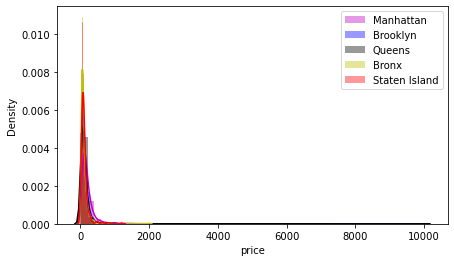

In [537]:
sns.distplot(df_new[df_new['neighbourhood_group_cleansed']=='Manhattan']['price'],color='m' ,label = 'Manhattan' )
sns.distplot(df_new[df_new['neighbourhood_group_cleansed']=='Brooklyn']['price'],color='b' , label = 'Brooklyn')
sns.distplot(df_new[df_new['neighbourhood_group_cleansed']=='Queens']['price'],color='black' , label = 'Queens')
sns.distplot(df_new[df_new['neighbourhood_group_cleansed']=='Bronx']['price'],color='y' , label ='Bronx')
sns.distplot(df_new[df_new['neighbourhood_group_cleansed']=='Staten Island']['price'],color='r' , label = 'Staten Island')
plt.legend()

# 2 Sample t_test

In [183]:
df_dom =df[df['host_is_superhost'] == 'f']['price']
df_dum = df[df['host_is_superhost'] == 't']['price']

<AxesSubplot:xlabel='price', ylabel='Density'>

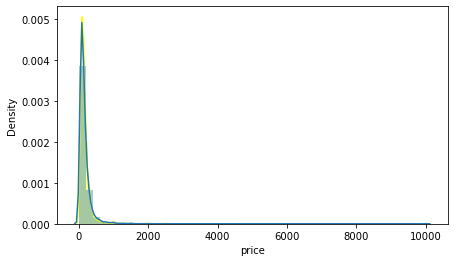

In [539]:
sns.distplot(df_dum , color = 'yellow')
sns.distplot(df_dom)

In [540]:
import scipy.stats as stats
print(stats.levene(df_dom , df_dum))
print('p_val less than 0.5 so reject null ')
print('varibales doesnt have equal variance')

LeveneResult(statistic=10.555526499039635, pvalue=0.0011594118582387688)
p_val less than 0.5 so reject null 
varibales doesnt have equal variance


In [541]:
print(stats.shapiro(df_dom ))
print(stats.shapiro(df_dum))
print('p_value is <0.5 so reject null data is not normal')

ShapiroResult(statistic=0.270064115524292, pvalue=0.0)
ShapiroResult(statistic=0.4581143856048584, pvalue=0.0)
p_value is <0.5 so reject null data is not normal


In [ ]:
# It is a non_parametric test
HN = 'mu(t) = Mu(f)'
HA = 'mu(t) != Mu(f)'

In [187]:
print(stats.ttest_ind(df_dom , df_dum))
print('p_value greater than 0.5 so fail to reject null')
print('Means are not varying much')

Ttest_indResult(statistic=1.4083683776346778, pvalue=0.1590301476571377)
p_value greater than 0.5 so fail to reject null
Means are not varying much


In [188]:
df_new.head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,room_type,bathrooms_text,instant_bookable
0,80.000000,73.000000,6.000000,1,1.000000,1.000000,30,1125,30.000000,30.000000,1125.000000,1125.000000,30.000000,1125.000000,3,33,63,338,48,0,4.700000,4.720000,4.620000,4.760000,4.790000,4.860000,4.410000,3,2,0,0,0.330000,f,t,Manhattan,Entire home,baths,f
1,72.682840,73.000000,1.000000,3,1.000000,3.000000,1,730,1.000000,1.000000,730.000000,730.000000,1.000000,730.000000,3,6,18,194,48,7,4.450000,4.580000,4.490000,4.780000,4.800000,4.710000,4.640000,1,1,0,0,2.565000,f,t,Brooklyn,Entire home,baths,f
2,100.000000,100.000000,1.000000,2,1.000000,1.000000,30,730,30.000000,30.000000,730.000000,730.000000,30.000000,730.000000,27,60,90,365,48,0,4.520000,4.500000,4.180000,4.910000,4.910000,4.470000,4.520000,2,0,2,0,0.520000,f,t,Brooklyn,Private room,baths,f
3,100.000000,73.000000,1.000000,4,1.000000,2.000000,5,1125,5.000000,5.000000,1125.000000,1125.000000,5.000000,1125.000000,3,3,12,123,2,1,5.000000,5.000000,5.000000,5.000000,5.000000,4.500000,5.000000,1,1,0,0,0.020000,f,t,Brooklyn,Entire home,baths,f
4,100.000000,100.000000,1.000000,2,1.000000,1.000000,2,14,2.000000,2.000000,14.000000,14.000000,2.000000,14.000000,1,16,34,192,48,7,4.250000,4.500000,4.180000,4.700000,4.725000,4.870000,4.360000,1,0,1,0,2.565000,f,f,Manhattan,Private room,baths,f


In [ ]:
#df_new.drop('host_is_superhost' , axis = 1 , inplace = True)

In [ ]:
# Numerical vs Numerical
HN = 'Variables doesnot have corelation'
HA = 'Variables are corelated'

In [229]:
for i in df_new.select_dtypes(include = np.number).columns:
    stat , p_val = stats.pearsonr(df_new[i] , np.sqrt(df_target['price']))
    if p_val > 0.05:
        print('{} Is insignificant p_val is{}'.format(i ,p_val))
    else :
        print('{} Is significant p_val is {}'.format(i , p_val))
    

host_response_rate Is significant p_val is 9.234805030888731e-07
host_acceptance_rate Is significant p_val is 3.958346094806481e-28
host_total_listings_count Is significant p_val is 2.610543335665879e-09
accommodates Is significant p_val is 0.0
bedrooms Is significant p_val is nan
beds Is significant p_val is 0.0
minimum_nights Is significant p_val is 3.600781915740181e-153
maximum_nights Is significant p_val is 0.00779526439523833
minimum_minimum_nights Is significant p_val is 3.418198346067513e-153
maximum_minimum_nights Is significant p_val is 8.113174390459153e-91
minimum_maximum_nights Is significant p_val is 0.007760314617211279
maximum_maximum_nights Is insignificant p_val is0.13095001736371867
minimum_nights_avg_ntm Is significant p_val is 7.547856043099395e-99
maximum_nights_avg_ntm Is insignificant p_val is0.6648858332967185
availability_30 Is significant p_val is 7.200222689679929e-171
availability_60 Is significant p_val is 9.463298413566414e-175
availability_90 Is signific

In [230]:
p_value = []
for i in df_new.select_dtypes(include = np.number).columns:
    stat , p_val = stats.pearsonr(df_new[i] , np.sqrt(df_target['price']))
    p_value.append(p_val)   


In [231]:
df_pval = pd.DataFrame(data = p_value , columns = ['p_values'])
df_pval['features'] = df_new.select_dtypes(include = np.number).columns
df_pval

,p_values,features
0,0.000001,host_response_rate
1,0.000000,host_acceptance_rate
2,0.000000,host_total_listings_count
3,0.000000,accommodates
4,NaN,bedrooms
5,0.000000,beds
6,0.000000,minimum_nights
7,0.007795,maximum_nights
8,0.000000,minimum_minimum_nights
9,0.000000,maximum_minimum_nights


In [ ]:
# All the numerical features have relation with targer (co_related)

# Model Building

In [232]:
df_encoded['constant'] = np.ones(len(df_encoded))

# Base model 

<AxesSubplot:xlabel='price', ylabel='Density'>

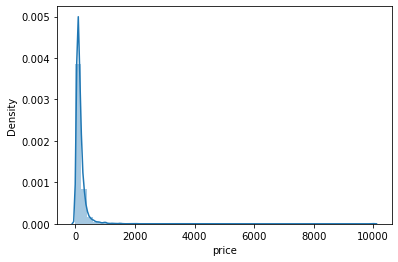

In [339]:
sns.distplot(df_target)

In [341]:
df_target.head()

0   150.000000
1    75.000000
2    60.000000
3   275.000000
4    68.000000
Name: price, dtype: float64

In [326]:
from sklearn.model_selection import train_test_split

In [343]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df_target['price'] = pt.fit_transform(df_target[['price']])

In [344]:
xtrain,xtest,ytrain,ytest = train_test_split(df_encoded , df_target, test_size = 0.3, random_state =2)

In [345]:
base_model = sm.OLS(ytrain , xtrain).fit()

In [346]:
print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     849.9
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        23:17:22   Log-Likelihood:                -26641.
No. Observations:               26793   AIC:                         5.337e+04
Df Residuals:                   26750   BIC:                         5.372e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [324]:
# Analysing the summary 
base_model.rsquared

0.14116223371343462

In [56]:
# Durbin Watson = 2.004 (equal to 2)
# so no auto correlation
# prob(jarque_bera) < 0.5
# errors are not following normal distribution
# cond_no >1000 
# implies severe multicollinearity
# there are some insignificant columns 

In [724]:
test_pred = base_model.predict(xtest)
pred_score = r2_score(ytest , test_pred)
pred_score

0.5650696707896815

In [57]:
# To improve model we need to remove multicollinearity 

In [270]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(xtrain)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(ytrain, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 6)
    
    # return the training RMSE
    return(rmse_train)

In [314]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(xtest)

    # MSE for the test data
    mse_test = mean_squared_error(ytest, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 6)

    # return the test RMSE
    return(rmse_test)

In [532]:
print('train rmse :' , get_train_rmse(base_model))
print('test rmse :' , get_test_rmse(base_model))
print('Model doesnot have overfitting')

train rmse : 0.654022
test rmse : 0.660636
Model doesnot have overfitting


In [354]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)
train_pred=base_model.predict(xtrain)
test_pred=base_model.predict(xtest)

In [355]:
mape_train = round(mape(ytrain['price'], train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

Mean Absolute Percentage Error (MAPE) on training set:  198.0052


In [356]:
mape_test = round(mape(ytest['price'], test_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on test set:  197.7984


In [494]:
def train_score(model) :
    train_pred = model.predict(xtrain)
    score = r2_score(ytrain , train_pred)
    return score
    
    

In [495]:
def test_score(model) :
    test_pred = model.predict(xtest)
    score = r2_score(ytest , test_pred)
    return score

# Lasso regression

In [507]:
lasso = Lasso()
from sklearn.metrics import r2_score

In [508]:
lasso_model = lasso.fit(xtrain , ytrain)

In [509]:
print('Train score :' , train_score(lasso_model))
print('Test score :' , test_score(lasso_model))

Train score : 0.04656058609491076
Test score : 0.0460088802914026


In [510]:
print('Train rmse :' , get_train_rmse(lasso_model))
print('test_rmse :' , get_test_rmse(lasso_model))

Train rmse : 0.975715
test_rmse : 0.978418


In [526]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]

In [527]:
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

In [528]:
lasso_grid_model =lasso_grid.fit(xtrain, ytrain)
lasso_grid_model.best_params_

{'alpha': 1e-08}

In [529]:
lst = Lasso(alpha = 1e-8)
lasso_tune = lst.fit(xtrain , ytrain)

In [530]:
print('Train score :' , train_score(lasso_tune))
print('Test score :' , test_score(lasso_tune))

Train score : 0.571617374472559
Test score : 0.5650707490975982


In [531]:
print('Train rmse' , get_train_rmse(lasso_tune))
print('Test rmse' , get_test_rmse(lasso_tune))

Train rmse 0.654022
Test rmse 0.660635


# PCA : Dimensionality reduction

In [219]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [222]:
df_scaled = ss.fit_transform(df_num)
df_scaled = pd.DataFrame(df_scaled , columns = df_num.columns)

In [248]:
cov_matrix = np.cov(df_scaled.T)

eig_val, eig_vec = np.linalg.eig(cov_matrix)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [5.69081109e+00 4.31326417e+00 3.69027137e+00 3.21431325e+00
 2.15457197e+00 1.81328283e+00 1.42702122e+00 9.32888804e-01
 8.45714661e-01 6.88084067e-01 6.34584281e-01 4.34180432e-01
 4.14336358e-01 4.00581339e-01 3.76266161e-01 3.29300196e-01
 3.14114377e-01 2.99745401e-01 2.28941452e-01 2.17863193e-01
 1.93810238e-01 1.35805918e-01 1.02407034e-01 8.17441499e-02
 2.97657781e-02 1.58667164e-02 1.45134057e-02 2.54670259e-03
 4.16108544e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00] 

Eigenvectors: 
 
 [[ 0.          0.          0.         ...  1.          0.
   0.        ]
 [-0.03587653 -0.03443292  0.13797366 ...  0.          0.
   0.        ]
 [-0.08167948  0.17608992 -0.20999551 ...  0.          0.
   0.        ]
 ...
 [-0.09102565  0.10648006 -0.12897149 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]
 [-0.274258   -0.09477364  0.10122913 ...  0.          0.
   0.        ]] 



In [236]:
# Percentage of explained variation

In [240]:
var = []
for i in eig_val :
    score = (i/sum(eig_val))*100
    var.append(score)

In [241]:
np.cumsum(var)

array([ 19.62297385,  34.49590999,  47.22065124,  58.30420045,
        65.73356488,  71.98610095,  76.90673523,  80.12350913,
        83.0396904 ,  85.41233209,  87.60049658,  89.09763137,
        90.52634011,  91.90761898,  93.2050546 ,  94.34054285,
        95.42366758,  96.45724541,  97.24667807,  97.99791083,
        98.66620453,  99.13448857,  99.48760705,  99.76947606,
        99.872114  ,  99.92682538,  99.9768703 ,  99.9856518 ,
       100.        , 100.        , 100.        , 100.        ])

In [242]:
# We consider 12 components which explains 90% of data 

In [256]:
eig_val

array([5.69081109e+00, 4.31326417e+00, 3.69027137e+00, 3.21431325e+00,
       2.15457197e+00, 1.81328283e+00, 1.42702122e+00, 9.32888804e-01,
       8.45714661e-01, 6.88084067e-01, 6.34584281e-01, 4.34180432e-01,
       4.14336358e-01, 4.00581339e-01, 3.76266161e-01, 3.29300196e-01,
       3.14114377e-01, 2.99745401e-01, 2.28941452e-01, 2.17863193e-01,
       1.93810238e-01, 1.35805918e-01, 1.02407034e-01, 8.17441499e-02,
       2.97657781e-02, 1.58667164e-02, 1.45134057e-02, 2.54670259e-03,
       4.16108544e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [398]:
eig_vector = eig_vec[0:,[0,1,2,3,4,5,6,7,8,9,10]]

In [399]:
df_pca = pd.DataFrame(data = df_num.dot(eig_vector))

In [400]:
df_pca.rename(columns = {0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7',7:'PC8',8:'PC9',9:'PC10' , 10:'PC11'} , inplace = True)

In [401]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,483.392833,670.654251,1163.766977,1713.722385,134.197996,195.007735,-101.220761,171.488743,59.180554,-37.783253,-0.077182
1,295.655688,405.922658,791.493980,1102.707955,93.226603,109.889567,-61.382272,96.929539,37.792222,-25.510430,2.155289
2,271.144182,465.333060,691.223525,1173.265682,66.295532,177.448985,-28.743145,64.666344,53.733754,-34.187326,2.911848
3,519.157982,618.831980,1250.189494,1648.013378,165.855176,149.649064,-159.170322,154.321179,46.884276,-24.114675,-11.736508
4,-52.458550,18.947844,-27.224969,85.833287,-20.400780,27.785509,65.016336,-68.515286,23.057492,-17.580202,7.877463


In [402]:
df_final_pca = pd.concat([df_pca , df_dum] ,axis =1)
df_final_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,host_is_superhost_t,host_identity_verified_t,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,neighbourhood_group_cleansed_Staten Island,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_private_bath,bathrooms_text_shared_bathroom,instant_bookable_t
0,483.392833,670.654251,1163.766977,1713.722385,134.197996,195.007735,-101.220761,171.488743,59.180554,-37.783253,-0.077182,0,1,0,1,0,0,0,0,0,0,0,0
1,295.655688,405.922658,791.493980,1102.707955,93.226603,109.889567,-61.382272,96.929539,37.792222,-25.510430,2.155289,0,1,1,0,0,0,0,0,0,0,0,0
2,271.144182,465.333060,691.223525,1173.265682,66.295532,177.448985,-28.743145,64.666344,53.733754,-34.187326,2.911848,0,1,1,0,0,0,0,1,0,0,0,0
3,519.157982,618.831980,1250.189494,1648.013378,165.855176,149.649064,-159.170322,154.321179,46.884276,-24.114675,-11.736508,0,1,1,0,0,0,0,0,0,0,0,0
4,-52.458550,18.947844,-27.224969,85.833287,-20.400780,27.785509,65.016336,-68.515286,23.057492,-17.580202,7.877463,0,0,0,1,0,0,0,1,0,0,0,0


In [403]:
df_final_pca = sm.add_constant(df_final_pca)

<AxesSubplot:xlabel='price', ylabel='Density'>

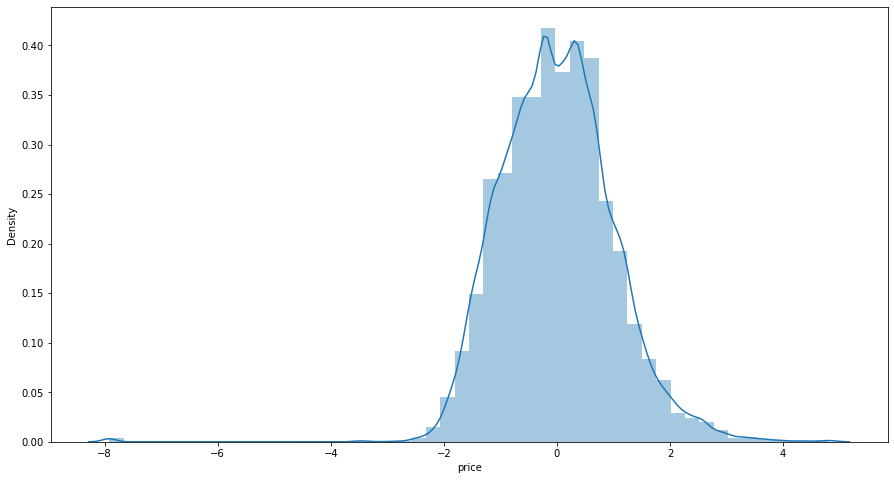

In [404]:
df_final_pca.shape
sns.distplot(df_target['price'])

In [405]:
xtrainp , xtestp,ytrainp , ytestp =train_test_split(df_final_pca , df_target , random_state = 1 , test_size = 0.3)

In [406]:
pca_model = sm.OLS(ytrainp , xtrainp).fit()
print(pca_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1373.
Date:                Tue, 03 May 2022   Prob (F-statistic):               0.00
Time:                        23:41:11   Log-Likelihood:                -27696.
No. Observations:               26793   AIC:                         5.544e+04
Df Residuals:                   26769   BIC:                         5.564e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

# Decision tree regressor

In [416]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 1)

In [417]:
dt_model = dt.fit(xtrain , ytrain)

In [533]:
print('Accuracy on train data' , train_score(dt_model))
print('Accuracy on test data', test_score(dt_model))

Accuracy on train data 0.9769047307905014
Accuracy on test data 0.3982984768497163


In [420]:
# Model is overfitting 

In [423]:
# Hyper parameter tuning for max_depth
tuned_params = [{'max_depth' : [7,8,9,10,12,15] , 
                'criterion' : ['squared_error', 'friedman_mse']}]
dt_grid = GridSearchCV(estimator = dt  , 
                      param_grid = tuned_params ,
                      cv = 5)

In [424]:
dt_grid_model = dt_grid.fit(xtrain , ytrain)
dt_grid_model.best_params_

{'criterion': 'squared_error', 'max_depth': 9}

In [537]:
dt = DecisionTreeRegressor(random_state = 1 , max_depth = 9)
tuned_model = dt.fit(xtrain , ytrain)

In [538]:
print('Accuracy on train data' , train_score(tuned_model))
print('Accuracy on test data', test_score(tuned_model))

Accuracy on train data 0.6821752873043108
Accuracy on test data 0.5996124732652096


In [540]:
print('Train rmse :' , get_train_rmse(tuned_model))
print('Test rmse :' , get_test_rmse(tuned_model) )

Train rmse : 0.56334
Test rmse : 0.633859


# Random Forest Regressor

In [468]:
from sklearn.ensemble import RandomForestRegressor

In [413]:
#df_encoded['constant'] = np.ones(len(df_encoded))

In [117]:
#xtrain1 , xtest1 ,ytrain1 , ytest1 = train_test_split(df_encoded , df_target , random_state=1 , test_size = 0.3)

In [469]:
rt = RandomForestRegressor(random_state = 1)

In [470]:
rt_model = rt.fit(xtrain, ytrain)

In [471]:
pred = rt_model.predict(xtest)
pred_train = rt_model.predict(xtrain)

In [472]:
from sklearn.metrics import r2_score

In [473]:
print("R2 Score: ", r2_score(ytest, pred))
print('R2 Score :' ,r2_score(ytrain , pred_train))

R2 Score:  0.6671694361909977
R2 Score : 0.9356960382723759


In [ ]:
tuned_paramaters = [{'bootstrap': [True] ,
                     'n_estimators': [100,120 ,140 ,160, 200],
                     'max_depth': [8,10,12,15,18,20]}]
 

In [463]:
rf_grid = GridSearchCV(estimator = rt, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

In [466]:
rf_grid_model = rf_grid.fit(xtrain, ytrain)

In [467]:
rf_grid_model.best_params_

{'bootstrap': True, 'max_depth': 15, 'n_estimators': 120}

In [485]:
rt_tuned = RandomForestRegressor(n_estimators= 120 , max_depth = 15)

In [486]:
rt_tuned_model = rt_tuned.fit(xtrain , ytrain)

In [542]:
print("R2 Score: ", train_score(rt_tuned_model))
print('R2 Score :' ,test_score(rt_tuned_model))

R2 Score:  0.8608215646632554
R2 Score : 0.6754604621197042


In [543]:
print('Train rmse :' , get_train_rmse(rt_tuned_model))
print('Test rmse :' , get_test_rmse(rt_tuned_model))

Train rmse : 0.372789
Test rmse : 0.570672


In [491]:
mape_train = round(mape(ytrain['price'], pred_train_tun),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

Mean Absolute Percentage Error (MAPE) on training set:  121.7909


In [492]:
mape_test = round(mape(ytest['price'], pred_tun_test),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on test set:  173.7144


# ADA BOOST REGRESSOR

In [493]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [747]:
ada = AdaBoostRegressor(base_estimator =DecisionTreeRegressor())

ada_base = ada.fit(xtrain, ytrain)
print('Train score :' ,train_score(ada_base))
print('Test score :' , test_score(ada_base))

Train score : 0.9215106243453366
Test score : 0.6444289158164964


In [620]:
ada = AdaBoostRegressor(base_estimator =DecisionTreeRegressor(max_depth = 9) ,n_estimators = 100 , learning_rate = 0.1)

ada_model = ada.fit(xtrain, ytrain)
print('Train score :' ,train_score(ada_model))
print('Test score :' , test_score(ada_model))

Train score : 0.7314256233293119
Test score : 0.6429348755988342


In [621]:
ada = AdaBoostRegressor(base_estimator =DecisionTreeRegressor(max_depth = 10) ,n_estimators = 100 , learning_rate = 0.1)

ada_model = ada.fit(xtrain, ytrain)
print('Train score :' ,train_score(ada_model))
print('Test score :' , test_score(ada_model))

Train score : 0.7677388391039173
Test score : 0.6597972423210875


In [622]:
# Increase in max_depth causes more training error

In [624]:
ada = AdaBoostRegressor(base_estimator =DecisionTreeRegressor(max_depth =  8) ,n_estimators = 120 , learning_rate = 0.1)

ada_model = ada.fit(xtrain, ytrain)
print('Train score :' ,train_score(ada_model))
print('Test score :' , test_score(ada_model))

Train score : 0.6978018031487171
Test score : 0.629136681617824


In [744]:
ada = AdaBoostRegressor(base_estimator =DecisionTreeRegressor(max_depth =  8) ,n_estimators = 100 , learning_rate = 0.1 ,random_state =1)

ada_tuned = ada.fit(xtrain, ytrain)
print('Train score :' ,train_score(ada_tuned))
print('Test score :' , test_score(ada_tuned))

Train score : 0.6959069492951739
Test score : 0.6267204269584645


In [627]:
# Best parameters
# {'max_depth' : 8 , 'n_estimators' : 100 , leraning_rate = 0.1}

# Gradient Boosting Model

In [775]:

from sklearn.ensemble import GradientBoostingRegressor

gbm= GradientBoostingRegressor()

gbm_base = gbm.fit(xtrain, ytrain)
print('Train score :' ,train_score(gbm_base))
print('Test score :' , test_score(gbm_base))
print('Train rmse :' , get_train_rmse(gbm_base))
print('Test rmse :' , get_test_rmse(gbm_base))

Train score : 0.6630087475618877
Test score : 0.6353340282329918
Train rmse : 0.580077
Test rmse : 0.604923


In [646]:
gbm = GradientBoostingRegressor(max_depth = 8 )

gbm_model = gbm.fit(xtrain, ytrain)
print('Train score :' ,train_score(gbm_model))
print('Test score :' , test_score(gbm_model))
print('Train rmse :' , get_train_rmse(gbm_model))
print('Test rmse :' , get_test_rmse(gbm_model))

Train score : 0.8441709547740444
Test score : 0.6872099543709627
Train rmse : 0.394458
Test rmse : 0.560246


In [648]:
gbm = GradientBoostingRegressor(max_depth = 6, n_estimators = 120)

gbm_model = gbm.fit(xtrain, ytrain)
print('Train score :' ,train_score(gbm_model))
print('Test score :' , test_score(gbm_model))
print('Train rmse :' , get_train_rmse(gbm_model))
print('Test rmse :' , get_test_rmse(gbm_model))

Train score : 0.7754206915114951
Test score : 0.6820834982349946
Train rmse : 0.473545
Test rmse : 0.564819


In [649]:
gbm = GradientBoostingRegressor(max_depth = 5, n_estimators = 100 )

gbm_model = gbm.fit(xtrain, ytrain)
print('Train score :' ,train_score(gbm_model))
print('Test score :' , test_score(gbm_model))
print('Train rmse :' , get_train_rmse(gbm_model))
print('Test rmse :' , get_test_rmse(gbm_model))

Train score : 0.7298898647537966
Test score : 0.6710871863654659
Train rmse : 0.519334
Test rmse : 0.574504


In [673]:
# Best params
gbm = GradientBoostingRegressor(max_depth = 5, n_estimators = 120 )

gbm_tuned = gbm.fit(xtrain, ytrain)
print('Train score :' ,train_score(gbm_tuned))
print('Test score :' , test_score(gbm_tuned))
print('Train rmse :' , get_train_rmse(gbm_model))
print('Test rmse :' , get_test_rmse(gbm_model))

Train score : 0.738025731146593
Test score : 0.6753980255730118
Train rmse : 0.477475
Test rmse : 0.56365


In [671]:
gbm = GradientBoostingRegressor(max_depth = 5, n_estimators = 120 , learning_rate = 0.2)

gbm_model = gbm.fit(xtrain, ytrain)
print('Train score :' ,train_score(gbm_model))
print('Test score :' , test_score(gbm_model))
print('Train rmse :' , get_train_rmse(gbm_model))
print('Test rmse :' , get_test_rmse(gbm_model))

Train score : 0.7716782548507511
Test score : 0.6833976963055357
Train rmse : 0.477475
Test rmse : 0.56365


In [714]:
important_features = pd.DataFrame({'Features':  xtrain.columns,
                                 'Importance': gbm_tuned.feature_importances_})

important_features =important_features.sort_values(by = 'Importance', ascending = True)

<BarContainer object of 45 artists>

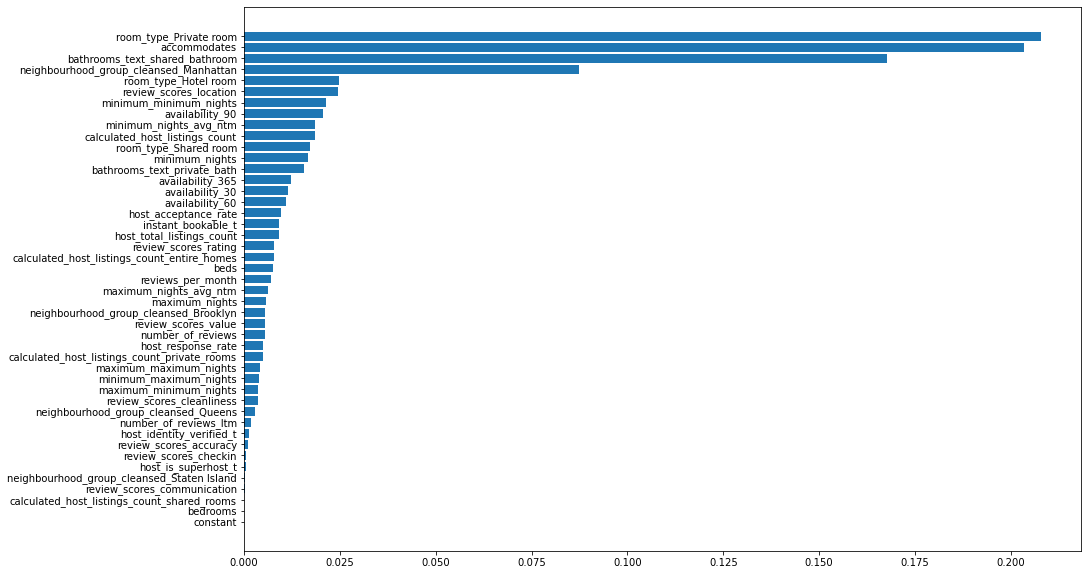

In [716]:
plt.barh(important_features['Features'] , important_features['Importance'])

In [636]:
# We are choosing best params as 
# {max_depth = 5 , n_estimators = 120 , learning_rate = 0.1}
# Since increase in parameters causing more train_errors and overfitting_issues

In [637]:
# Tune the Parameters....

from sklearn.model_selection import GridSearchCV

params = {"learning_rate":[0.1, 0.01, 0.001],
         "n_estimators":[100,120,150,180,200],
         "max_depth":[4,5,6,7,8],
         }

In [609]:
grid = GridSearchCV(estimator=gbm, param_grid=params)

grid.fit(xtrain, ytrain)

print(grid.best_params_)

KeyboardInterrupt: 

# XG boost

In [595]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

In [593]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [591]:
xgb_model = xgb.fit(xtrain, ytrain)

In [592]:
train_score(xgb_model)
test_score(xgb_model)

0.6831153192716527

In [ ]:
grid_xg = GridSearchCV(estimator=xgb, param_grid= tuning_parameters)

grid_xg.fit(xtrain, ytrain)

In [598]:
print(grid_xg.best_params_)

{'gamma': 1, 'learning_rate': 0.2, 'max_depth': 6}


In [601]:
xgb1 = XGBRegressor(gamma = 1 , learning_rate = 0.2 , max_depth = 6)

In [602]:
xgb_tuned = xgb1.fit(xtrain , ytrain)

In [603]:
print('Train score :' , train_score(xgb_tuned))
print('Test score :' , test_score(xgb_tuned))

Train score : 0.7924463047908064
Test score : 0.6824934916600406


In [604]:
print('Train rmse :' , get_train_rmse(xgb_tuned))
print('Test rmse :' , get_test_rmse(xgb_tuned))

Train rmse : 0.455241
Test rmse : 0.564454


# Light gbm

In [638]:
pip install lightgbm

In [639]:
from lightgbm import LGBMRegressor

In [640]:
lgb = LGBMRegressor()

In [641]:
lgb_model = lgb.fit(xtrain , ytrain)

In [642]:
print('Train score :' , train_score(lgb_model))
print('Test score :' , test_score(lgb_model))

Train score : 0.7351517648257427
Test score : 0.6771245447720295


In [643]:
print('Train rmse :' , get_train_rmse(lgb_model))
print('Test rmse :' , get_test_rmse(lgb_model))

Train rmse : 0.514251
Test rmse : 0.569207


In [685]:
params = [{'num_leaves' : [16, 21, 28,31,50] ,
          'learning_rate' : [0.1 , 0.2 , 0.3],
          'max_depth' :[-1 , 3, 5, 7]}]

In [686]:
grid_lbg = GridSearchCV(lgb, param_grid = params, scoring='accuracy', cv=5)
grid_lbg.fit(xtrain, ytrain).best_params_

{'learning_rate': 0.1, 'max_depth': -1, 'num_leaves': 16}

In [687]:
lgb = LGBMRegressor(max_depth = -1 , num_leaves = 16 , learning_rate = 0.1)
lgb_tuned = lgb.fit(xtrain , ytrain)

In [688]:
print('Train score :' , train_score(lgb_tuned))
print('Test score :' , test_score(lgb_tuned))

Train score : 0.7047521783313935
Test score : 0.6688535367772274


# Score card

In [763]:
update_score = pd.DataFrame(columns = ['Model_name', 'r_squred(train)' , 'r_squared(test)' ,\
                                      'rmse(train)' , 'rmse(test)'])

In [764]:
update_score =update_score.append({'Model_name' : 'Base_model' , 'r_squred(train)' :base_model.rsquared , 'r_squared(test)' :\
                    pred_score ,'rmse(train)' : get_train_rmse(base_model) , 'rmse(test)' :\
                    get_test_rmse(base_model)} , ignore_index = True)

In [765]:
update_score =update_score.append({'Model_name' : 'Lasso_model' , 'r_squred(train)' :train_score(lasso_model) , 'r_squared(test)' :\
                    test_score(lasso_model) ,'rmse(train)' : get_train_rmse(lasso_model) , 'rmse(test)' :\
                    get_test_rmse(lasso_model)} , ignore_index = True)

In [766]:
update_score =update_score.append({'Model_name' : 'Lasso_tune' , 'r_squred(train)' :train_score(lasso_tune) , 'r_squared(test)' :\
                    test_score(lasso_tune) ,'rmse(train)' : get_train_rmse(lasso_tune) , 'rmse(test)' :\
                    get_test_rmse(lasso_tune)} , ignore_index = True)

In [767]:
update_score =update_score.append({'Model_name' : 'Decision_tree' , 'r_squred(train)' :train_score(dt_model) , 'r_squared(test)' :\
                    test_score(dt_model) ,'rmse(train)' : get_train_rmse(dt_model) , 'rmse(test)' :\
                    get_test_rmse(dt_model)} , ignore_index = True)

In [768]:
update_score =update_score.append({'Model_name' : 'Decisiontree(tuned)' , 'r_squred(train)' :train_score(tuned_model) , 'r_squared(test)' :\
                    test_score(tuned_model) ,'rmse(train)' : get_train_rmse(tuned_model) , 'rmse(test)' :\
                    get_test_rmse(tuned_model)} , ignore_index = True)

In [769]:
update_score =update_score.append({'Model_name' : 'RandomForest' , 'r_squred(train)' :train_score(rt_model) , 'r_squared(test)' :\
                    test_score(rt_model) ,'rmse(train)' : get_train_rmse(rt_model) , 'rmse(test)' :\
                    get_test_rmse(rt_model)} , ignore_index = True)

In [770]:
update_score =update_score.append({'Model_name' : 'RandomForest(tuned)' , 'r_squred(train)' :train_score(rt_tuned_model) , 'r_squared(test)' :\
                    test_score(rt_tuned_model) ,'rmse(train)' : get_train_rmse(rt_tuned_model) , 'rmse(test)' :\
                    get_test_rmse(rt_tuned_model)} , ignore_index = True)

In [771]:
update_score =update_score.append({'Model_name' : 'Adaboost' , 'r_squred(train)' :train_score(ada_base) , 'r_squared(test)' :\
                    test_score(ada_base) ,'rmse(train)' : get_train_rmse(ada_base) , 'rmse(test)' :\
                    get_test_rmse(ada_base)} , ignore_index = True)

In [773]:
update_score =update_score.append({'Model_name' : 'Adaboost(tuned)' , 'r_squred(train)' :train_score(ada_tuned) , 'r_squared(test)' :\
                    test_score(ada_tuned) ,'rmse(train)' : get_train_rmse(ada_tuned) , 'rmse(test)' :\
                    get_test_rmse(ada_tuned)} , ignore_index = True)

In [776]:
update_score =update_score.append({'Model_name' : 'Gradientboosting' , 'r_squred(train)' :train_score(gbm_base) , 'r_squared(test)' :\
                    test_score(gbm_base) ,'rmse(train)' : get_train_rmse(gbm_base) , 'rmse(test)' :\
                    get_test_rmse(gbm_base)} , ignore_index = True)

In [777]:
update_score =update_score.append({'Model_name' : 'Gradientboosting(tuned)' , 'r_squred(train)' :train_score(gbm_tuned) , 'r_squared(test)' :\
                    test_score(gbm_tuned) ,'rmse(train)' : get_train_rmse(gbm_tuned) , 'rmse(test)' :\
                    get_test_rmse(gbm_tuned)} , ignore_index = True)

In [778]:
update_score =update_score.append({'Model_name' : 'Xgboost' , 'r_squred(train)' :train_score(xgb_model) , 'r_squared(test)' :\
                    test_score(xgb_model) ,'rmse(train)' : get_train_rmse(xgb_model) , 'rmse(test)' :\
                    get_test_rmse(xgb_model)} , ignore_index = True)

In [779]:
update_score =update_score.append({'Model_name' : 'Xgboost(tuned)' , 'r_squred(train)' :train_score(xgb_tuned) , 'r_squared(test)' :\
                    test_score(xgb_tuned) ,'rmse(train)' : get_train_rmse(xgb_tuned) , 'rmse(test)' :\
                    get_test_rmse(xgb_tuned)} , ignore_index = True)

In [781]:
update_score =update_score.append({'Model_name' : 'LightGBM' , 'r_squred(train)' :train_score(lgb_model) , 'r_squared(test)' :\
                    test_score(lgb_model) ,'rmse(train)' : get_train_rmse(lgb_model) , 'rmse(test)' :\
                    get_test_rmse(lgb_model)} , ignore_index = True)

In [782]:
update_score =update_score.append({'Model_name' : 'LightGBM(tuned)' , 'r_squred(train)' :train_score(lgb_tuned) , 'r_squared(test)' :\
                    test_score(lgb_tuned) ,'rmse(train)' : get_train_rmse(lgb_tuned) , 'rmse(test)' :\
                    get_test_rmse(lgb_tuned)} , ignore_index = True)

In [783]:
update_score

,Model_name,r_squred(train),r_squared(test),rmse(train),rmse(test)
0,Base_model,0.571617,0.565070,0.654022,0.660636
1,Lasso_model,0.046561,0.046009,0.975715,0.978418
2,Lasso_tune,0.571617,0.565071,0.654022,0.660635
3,Decision_tree,0.976905,0.398298,0.151858,0.777039
4,Decisiontree(tuned),0.682175,0.599612,0.563340,0.633859
5,RandomForest,0.935696,0.667169,0.253393,0.577915
6,RandomForest(tuned),0.860822,0.675460,0.372789,0.570672
7,Adaboost,0.921511,0.644429,0.279951,0.597332
8,Adaboost(tuned),0.695907,0.626720,0.551036,0.612026
9,Gradientboosting,0.663009,0.635334,0.580077,0.604923


# Model selection

In [ ]:
'''Our main model is gradientboosting(tuned) model since we got 73% accuracy in train and 67% on test ,
Even we are getting more train accuracy in different models but test score got decreased devastingly so 
it leads to overfitting issues , since the difference is low and accuracy is high we are selecting gradient boosting as 
our final model'''

In [784]:
# Final model : Gradient boosting (tuned)

# Interpretations

<BarContainer object of 45 artists>

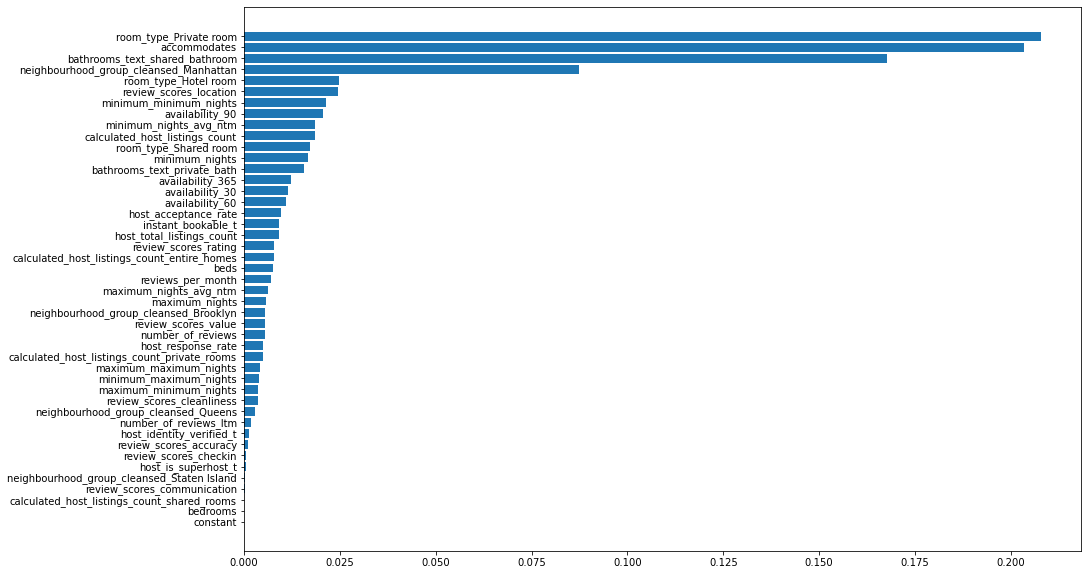

In [785]:
plt.barh(important_features['Features'] , important_features['Importance'])

# Based upon the feature importance 
1. We can see that the four features, 'room_type’, ‘accommodates',
   'bathrooms_text', and ‘neighbourhood_group_cleansed'
    have a very significant impact on the prediction of the target variable.
2 . We can say that room_type and accomodates , neighbourhood_group_cleansed are contributing
    more in price prediction
3 . In room_type we have 3 types 
    -> hotel_room
    ->shared_room
    ->private room 
    -> entire home
    # private room is contributing more in predicting the price
4 . Accomodates : No of people can share
    -> Accomodates are more significant since (increase in accomodates increase price)
    -> Accomodates has positive corealtion with price
5 . Neighbourhood_group_cleansed (location):
    -> Location wise Manhattan is contributing more , staten island has lowest contributuion(nearer to 0)
    -> Price varies with Location , manhattan is costliest area , listings can have higher price in this location with
    basic amenities compared to other location followed by brooklyn 
6 . Bathrooms text (Type of bathrooms)
    -> Shared_bathrooms are contributing more and people are opting for listings with shared bathrooms 
    -> listings with private bath are too costly and are less in number
7. Avalibility (No of days it is available) 
    -> Listings are available per different number of days
    -> No of days listing is available out of mentioned days
    -> All the Availibility features are highly corelated since they are all equally contibuting 
8. Review score rating and review score accuracy are somewhat significant than review_score communication
9. No of beds have less significance compared to bathrooms 
10. host identified , host is super host ,bedrooms , review score communication are less significant features
    

In [ ]:
# Buissness interpretation
1. We can see that the four features, 'room_type’, ‘accommodates',
   'bathrooms_text', and 'neighbourhood_group_cleansed' are playing major role in higher prices
2. In room_type if it is hotel room they can list their listing for higher price
3. Location wise manhattan listings are more costlier followed by brooklyn
4. Accomodates : More the number of accomodates more will be the price , they can list higher price
5. Bathrooms_text : private_bathroom is more costlier and we have limited number of listings so it may cause 
       higher demand so the price is high 
6. Host_is_superhost is not effecting price , single listing price is not getting effected by total number of listings
7. No of reviews not effecting the price
8. there are more number of listings with 2 accomodates 
